## Eldad kronfeld 313429607
## Vlad Barkanas 317225993

# readme
please unzip the whole lab so you would be able to see the 3d plot.

In [92]:
"""
@author: Eldad Kronfeld
@author: Vlad Barkanas
"""
from math import sqrt
import numpy as np
from numpy.linalg import norm
#import datasets 
from sklearn import datasets



# function for arbitrary K
this function takes a single data point and run a KNN on it

In [93]:
#distance function 
def dist(x,y):
    return norm(x-y)

#KNN for a single data point
def singleKNN(data,single,K):
    KN = np.empty((K,2)) # [distance, index]
    data = np.array(data)
    
    dists = np.empty((len(data),2)) #distance vector from each point in the data_set
    for i,row in enumerate(data): 
        dists[i,0] = dist(row,single)
        dists[i,1] = row[4]
    
    #initiate the K nearest 
    for i,row in enumerate(dists[0:K]):
        KN[i] = row
    #calculate who are the K nearest
    for row in dists[K:]:
        M = np.max(KN[0:,0])
        if row[0] < M:
            index = np.where(KN == np.amax(KN))
            index = index[0]
            KN[index[0]] = row
    # find the highest label and create a counter vector for each one of the possible
    # labels
    M = int(np.max(data[:,1]))
    count = np.zeros((M,1))
    for row in KN:
        count[int(row[1])] += 1
    index = np.where(count == np.amax(count))
    index = index[0]
    return index #return the highest label


# 2d plot function

In [ ]:
import matplotlib.pyplot as plt
def plotScatter(data,testing):
    s1 = plt.scatter(data[:,0],data[:,1],c = data[:,4] , s=100, alpha = 0.9,label = "data set", marker='o')
    plt.legend(["data set","training"])
    s2 = plt.scatter(testing[:,0],testing[:,1],c = testing[:,4], s=100, alpha = 0.9,label="training set",marker='*')
    plt.title("categorizing irises using KNN alg")
    plt.legend()
    plt.show()


# main
takes the iris data set of 2 speciece and divide it to data and testing then runs the function from above on K=1

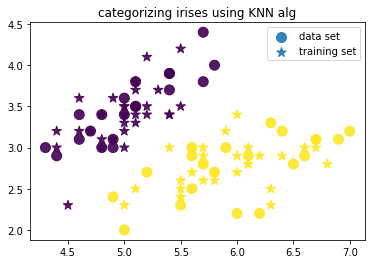

In [99]:

iris = datasets.load_iris()
data = iris.data[0:100]
lb = iris.target[0:100]
ds = np.empty((100,5))
ds[0:100,0:4] = data[0:100]
ds[0:100,4] = lb
data_set = np.concatenate((ds[0:20],ds[50:70]),axis = 0)
testing_set = np.concatenate((ds[20:50],ds[70:]),axis = 0)
K = 1
res = singleKNN(data_set,testing_set[33],1)
for i in range(len(testing_set)):
    testing_set[i,4] = singleKNN(data_set,testing_set[i],K)

plotScatter(data_set,testing_set)

# 3d plot function

In [ ]:
import matplotlib.pyplot as plt
def plotScatter3d(data,testing):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d',xlim=(4,6.9))
    ax.scatter(data[:,0],data[:,1],data[:,2],c = data[:,4], s=50, alpha = 1, marker='o', label = "data set")
    ax.scatter(testing[:,0],testing[:,1],testing[:,2],c = testing[:,4], s=50, alpha = 1,marker='*', label = "training set")
    plt.title("categorizing irises using KNN alg")
    fig.legend()
    plt.show()

plotScatter3d(data_set,testing_set)

![alt](Figure_1.png)